# Бинарное дерево поиска

Бинарное дерево поиска является структурой данных, которая соблюдает ряд правил:
    У каждого родителя есть максимум 2 потомка
    Значения не повторяются
    Дерево строится так, что значение родителя строго больше значения левого потомка и строго меньше значения правого потомка

Пример:

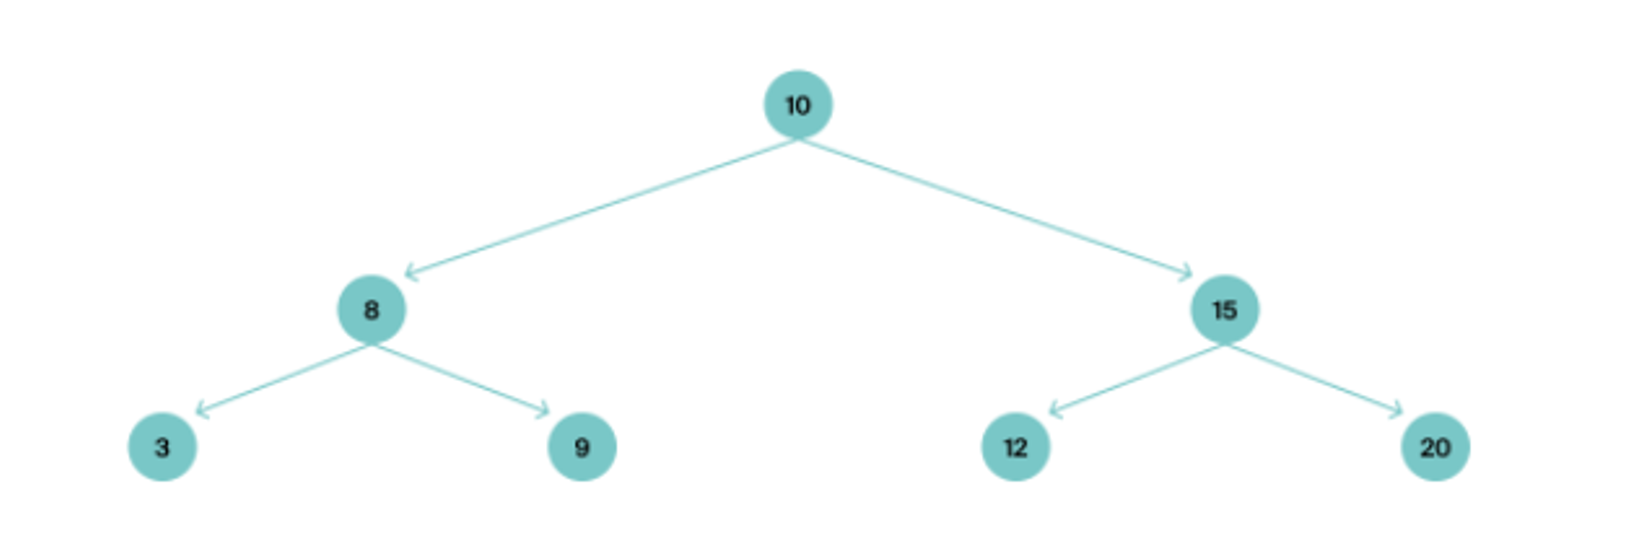

Для начала инициализируем класс, который отвечает за создание вершины. 
По стандарту потомки отсутствуют, а значит значение left и right равны None.

In [100]:
class Node():
    def __init__(self, value, left=None, right=None):
        self.value = value
        self.left = left
        self.right = right

Далее создадим класс самого бинарного дерева

Формирование бинарного дерева:
    Если добавляемое значение меньше значения родителя, то добавляем значение в левую ветвь, иначе в правую. 
    Если добавляемое значение уже есть, то нам необходимо его игнорировать.

In [101]:
class BinaryTree():
    def __init__(self):
        self.root = None
    
    def __find(self, node, parent, value):
        if node is None:
            return None, parent, False
        if node.value == value:
            return node, parent, True
        if node.value > value:
            if node.left:
                return self.__find(node.left, node, value)
        if node.value < value:
            if node.right:
                return self.__find(node.right, node, value)
        return node, parent, False

    def append(self, object):
        if self.root is None:
            self.root = object
            return object

        n, parent, flag_node = self.__find(self.root, None, object.value)

        if not flag_node:
            if n is not None:
                if n.value > object.value:
                    n.left = object
                if n.value < object.value:
                    n.right = object

        return object
    
    # Обход в глубину прямой(стандартный DFS)(root-left-right)
    
    def preorder_traversal_dfs(self, node):
        if node is None:
            return
        
        print(node.value, end=' ')
        self.preorder_traversal_dfs(node.left)
        self.preorder_traversal_dfs(node.right)
    
    # Обход в глубину по порядку value благодаря сбалансированности BST(left-root-right)

    def inorder_traversal_dfs(self, node):
        if node is None:
            return
        self.inorder_traversal_dfs(node.left)
        print(node.value, end=' ')
        self.inorder_traversal_dfs(node.right)

    # Обход в глубину обратный(обратный прямому поиску)(left-right-root)

    def postorder_traversal_dfs(self, node):
        if node is None:
            return
        
        self.postorder_traversal_dfs(node.left)
        self.postorder_traversal_dfs(node.right)
        print(node.value, end=' ')

In [102]:
v = [10, 5, 7, 16, 13, 2, 20]

t = BinaryTree()
for x in v:
    t.append(Node(x))


In [103]:
t.preorder_traversal_dfs(t.root)

10 5 2 7 16 13 20 

In [104]:
t.inorder_traversal_dfs(t.root)

2 5 7 10 13 16 20 

In [105]:
t.postorder_traversal_dfs(t.root)

2 7 5 13 20 16 10 

Обход в ширину BFS

In [125]:
from collections import deque

def bfs(root):
    queue = deque()
    queue += [root]
    while queue:
        node = queue.popleft()
        if node is not None:
            print(node.value, end=" ")
            queue.append(node.left)
            queue.append(node.right)
    

bfs(t.root)

10 5 16 2 7 13 20 